In [1]:
# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Loading testdata
data = pd.read_csv('testdata_nand.csv')

x = np.mat(data.iloc[:, 0:2].values)
y = np.mat(data.iloc[:, 2:].values)
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)

In [3]:
class ClassificationModel():
    def siggy(z):
        return 1/(1+np.e**-z)
        
    def __init__(self):
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
        
        self.W = tf.Variable([[0.0], [0.0]])
        self.b = tf.Variable([[0.0]])
        
        self.f = 1/(1 + np.e**-(tf.matmul(self.x, self.W) + self.b))
        
        self.loss = tf.losses.sigmoid_cross_entropy(self.y, self.f)

In [5]:
model = ClassificationModel()
mini_op = tf.train.GradientDescentOptimizer(100).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())

for i in range(10000):
    session.run(mini_op, {model.x: x_train, model.y: y_train})
    
W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_test, model.y: y_test})

In [6]:
# Predicting results from testdata and printing accuracy
temp_preds = session.run([model.f], {model.x: x_test, model.y: y_test})

# Compares observations and predictions (add .5 to observation to get int 0 or 1)
predictions = [int(i) for i in temp_preds[0]+0.5]
ys = y_test

number_correct = sum([int(predictions[x] == ys[x]) for x in range(len(ys))])

print(str(number_correct/len(ys)*100) + '% correct')

100.0% correct


<IPython.core.display.Javascript object>


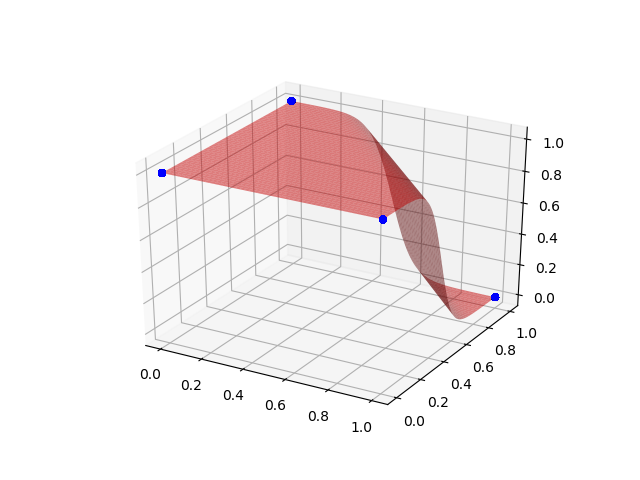

Loss: 0.41


In [7]:
%matplotlib notebook

# Fixing data for plotting the prediction plane
x_lin = np.linspace(0, 1, 1000)
y_lin = np.linspace(0, 1, 1000)

X, Y = np.meshgrid(x_lin, y_lin)

def siggy(X, Y):
    return 1/(1 + np.e**-((X*W[0]+Y*W[1]) + b))

Z = siggy(X, Y)

# Plotting plane and observations
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,0], x_test[:, 1], y_test, c='blue')
ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

plt.show()

print('Loss: %.2f' % loss)